### Step 1: Import Libraries

In [586]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [587]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#library required to group data into test & train data
from sklearn.model_selection import train_test_split

# library required to normalise the numarical variables 
from sklearn.preprocessing import MinMaxScaler

#importing statsmodels
import statsmodels.api as sm

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for model evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Suppressing warnings for certain visuals which are deprecated
import warnings
warnings.filterwarnings('ignore')

### Step 2: Reading and Understanding the Data

In [588]:
df=pd.read_csv(r"C:\Users\moham\OneDrive\Desktop\Projects\Python\EDA\BikeSharing\day.csv")

In [589]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [590]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [591]:
df.shape

(730, 16)

In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [593]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [594]:
df.ndim

2

### Step 3: Cleaning Data

#### 3.1: Handling Missing Values

In [595]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### 3.2: Renaming Columns

In [596]:
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'},inplace=True)
df.head(2)

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801


#### 3.3: Dropping Columns

In [597]:
## instant do not have any relavance with target column, as it is just a row number
df.drop('instant', axis=1, inplace=True)

## We have count column which is the total of casual and registered
df.drop(['casual','registered'], axis=1, inplace=True)

## We already have year and month columns so dteday would not be required
df.drop('dteday', axis=1, inplace=True)

In [598]:
print(f"➡️ After dropping columns, the dataframe has",df.shape[0],"rows and",df.shape[1],"columns")

➡️ After dropping columns, the dataframe has 730 rows and 12 columns


#### 3.4: Imputing Values  
The dataframe has indicative numerical value for each season, year, weekday, month & weathersit which aren't easy to comprehend. So, imputing indicative numerical values with string values. (source = data dictonary)

In [599]:
df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [600]:
# Creating Seasons function
def seasons(x):
    if x==1:
        return "spring"
    elif x==2:
        return "summer"
    elif x==3:
        return "fall"
    else:
        return "winter"

In [601]:
# Imputing season values
df['season']=df['season'].apply(seasons)

In [602]:
df.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [603]:
# Creating weekday function
def weekday(x):
    if x==1:
        return "monday"
    if x==2:
        return "tuesday"
    if x==3:
        return "wednesday"
    if x==4:
        return "thursday"
    if x==5:
        return "friday"
    if x==6:
        return "saturday"
    else:
        return "sunday"

In [604]:
# Imputing weekdays values
df['weekday']=df['weekday'].apply(weekday)

In [605]:
# Creating month function
def month(x):
    if x==1:
        return "january"
    if x==2:
        return "february"
    if x==3:
        return "march"
    if x==4:
        return "april"
    if x==5:
        return "may"
    if x==6:
        return "june"
    if x==7:
        return "july"
    if x==8:
        return "august"
    if x==9:
        return "september"
    if x==10:
        return "october"
    if x==11:
        return "november"
    else:
        return "december"

In [606]:
# Imputing month values
df['month']=df['month'].apply(month)

In [607]:
# Creating weathersit function
def weathersituation(x):
    if x==1:
        return "clear_sky"
    elif x==2:
        return "mist_cloudy"
    elif x==3:
        return "light_rain"
    else:
        return "heavy_rain"

In [608]:
# Imputing weathersitaution values
df['weathersit'] = df['weathersit'].apply(weathersituation)

In [609]:
df

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,january,0,monday,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,tuesday,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,clear_sky,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,clear_sky,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,clear_sky,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,december,0,friday,1,mist_cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,december,0,saturday,0,mist_cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,december,0,sunday,0,mist_cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,december,0,monday,1,clear_sky,10.489153,11.58500,48.3333,23.500518,1796


#### 3.5: Datatype Conversion

In [610]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [611]:
df['season']=df['season'].astype('category')
df['year']=df['year'].astype('category')
df['month']=df['month'].astype('category')
df['holiday']=df['holiday'].astype('category')
df['weekday']=df['weekday'].astype('category')
df['workingday']=df['workingday'].astype('category')
df['weathersit']=df['weathersit'].astype('category')

In [612]:
# Getting numerical columns
num_cols=df.select_dtypes(include="number")
num_cols

,temp,atemp,humidity,windspeed,count
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,2114
726,10.386653,12.75230,59.0000,10.416557,3095
727,10.386653,12.12000,75.2917,8.333661,1341
728,10.489153,11.58500,48.3333,23.500518,1796


In [613]:
num_list=num_cols.columns.tolist()
num_list

['temp', 'atemp', 'humidity', 'windspeed', 'count']

In [614]:
cat_cols=df.select_dtypes(exclude='number')
cat_list=cat_cols.columns.tolist()
cat_list

['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']

#### 3.6: Handling Outliers

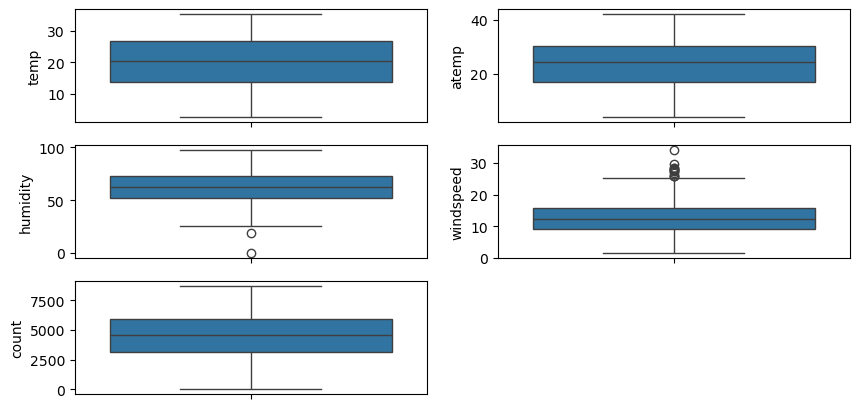

In [615]:
## Boxplot for continuous series
plt.figure(figsize=(10,5))
x=1
for a in num_list:
    plt.subplot(3,2,x)
    sns.boxplot(data=df,y=a)
    x=x+1
plt.show()

### Step 4: Exploratory Data Analysis

#### Uni-variate Analysis

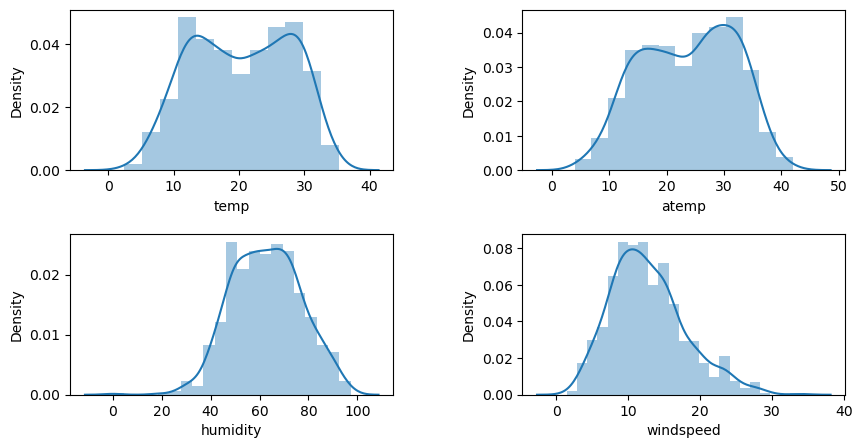

In [616]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.distplot(df.temp)
plt.subplots_adjust(wspace=0.4)

plt.subplot(2,2,2)
sns.distplot(df.atemp)
plt.subplots_adjust(hspace=0.4)

plt.subplot(2,2,3)
sns.distplot(df.humidity)

plt.subplot(2,2,4)
sns.distplot(df.windspeed)
plt.show()

#### Bi-variate Analysis

##### Numerical - Numerical

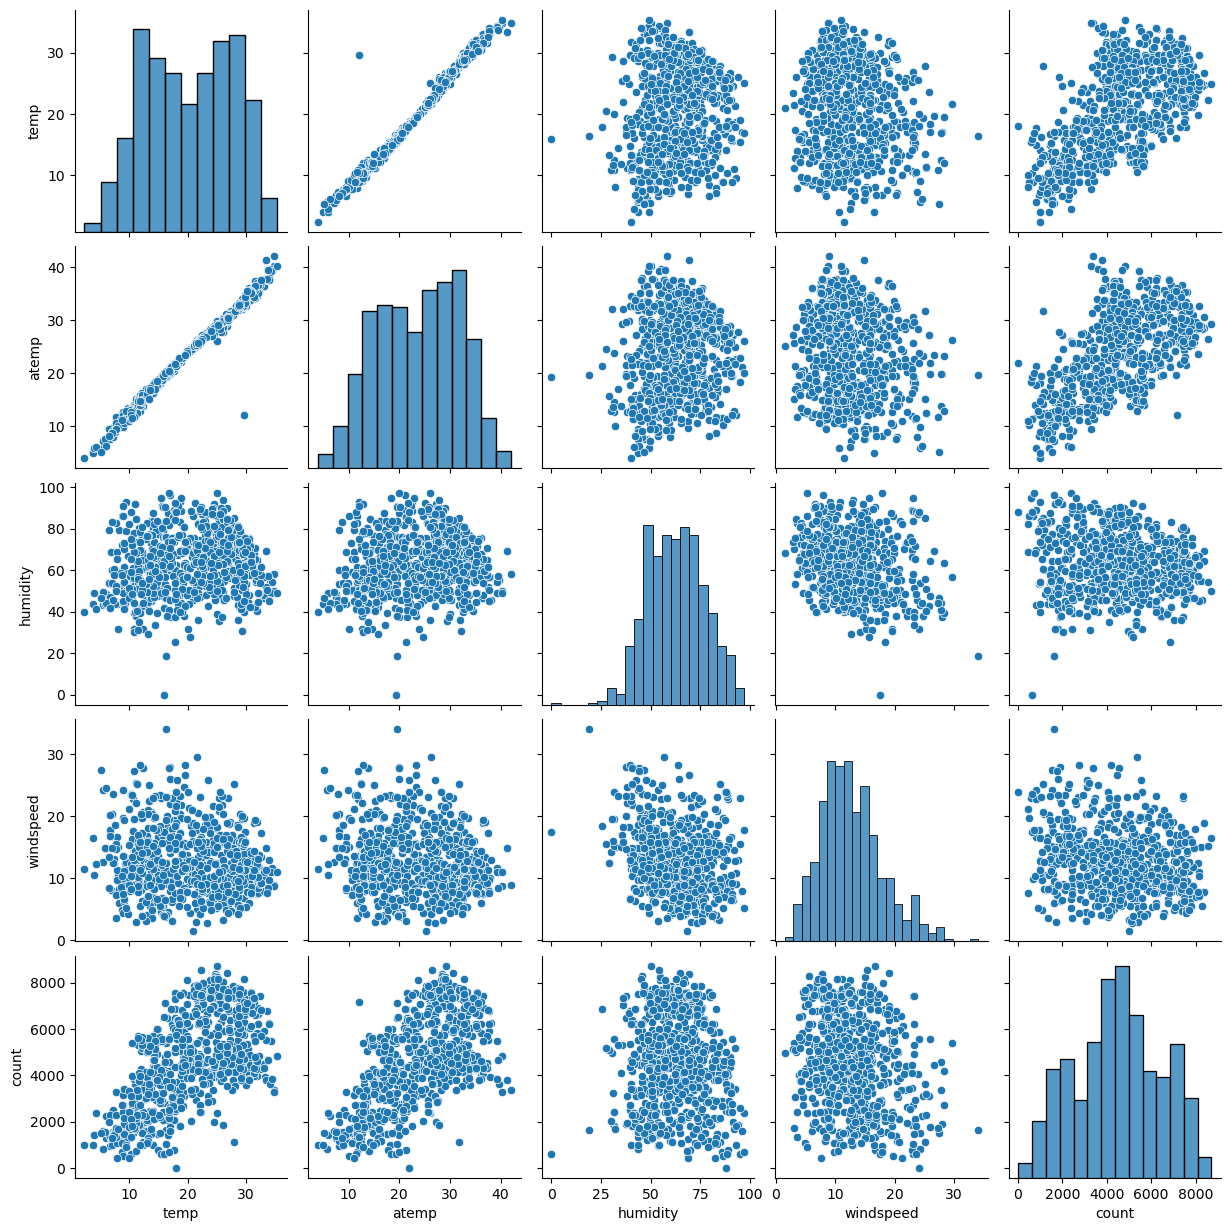

In [617]:
sns.pairplot(num_cols)
plt.show()

In [618]:
num_cols.corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
count,0.627044,0.630685,-0.098543,-0.235132,1.000000


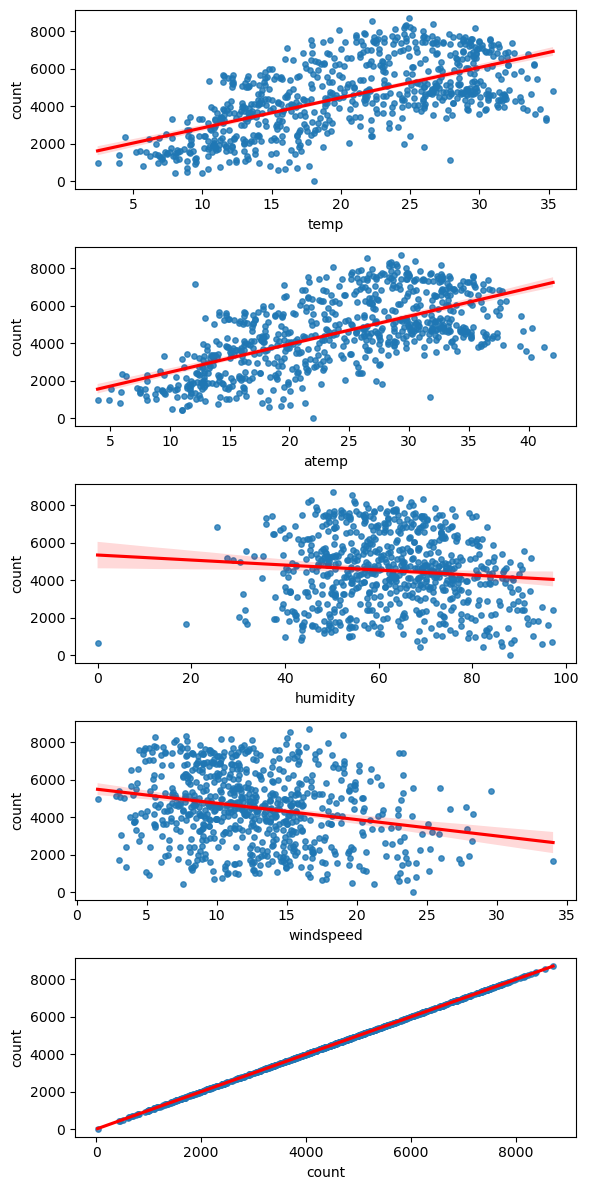

In [619]:
plt.figure(figsize=(6,12))
x=1
for a in num_list:
    plt.subplot(5,1,x)
    sns.regplot(data=df,y='count',x=a, scatter_kws={'s': 15}, line_kws={"color": "red"})
    x=x+1
plt.tight_layout()
plt.show()

**Insight:** Variable `temp` has the highest correlation with count  
Values are scattered, however demand of bikes have inverse relation with windspeed.

##### Categorical with Numerical (Target variable)

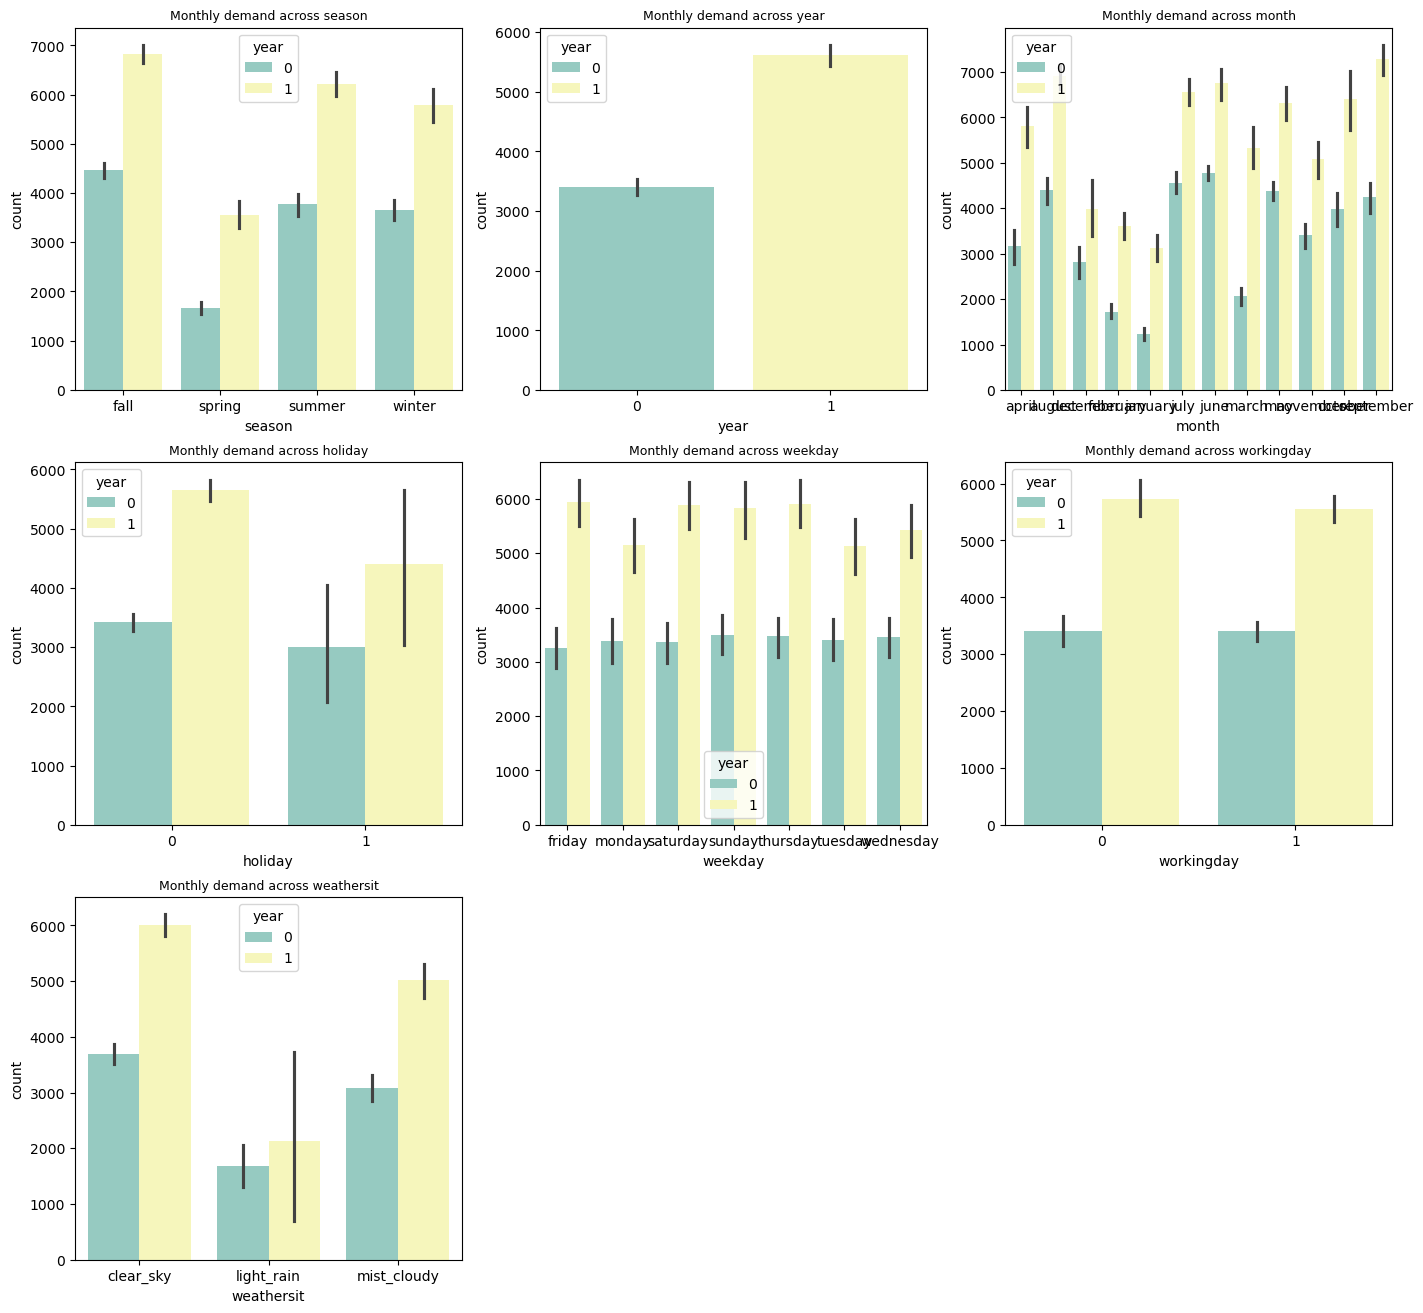

In [620]:
plt.figure(figsize=(17,16))
x=1
for a in cat_list:
    plt.subplot(3,3,x)
    sns.barplot(data=df,x=a,y='count',hue='year',palette='Set3')
    plt.title(f"Monthly demand across {a}",fontsize=9)
    x=x+1
plt.show()
    

#### Multi-variate Analysis

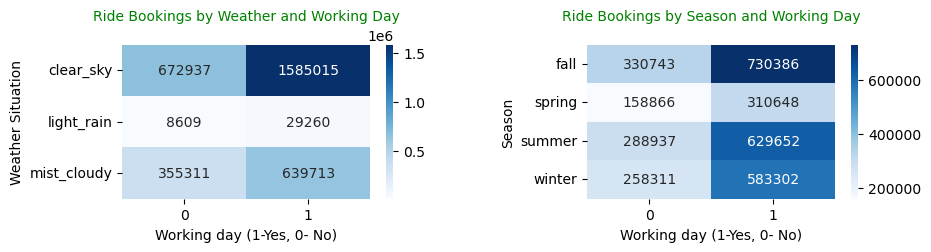

In [621]:
# setting up canvas size for the visual
plt.figure(figsize=([10,2]))

plt.subplot(1,2,1)

# Creating a Pivot table
weather_work=pd.pivot_table(data=df, index="weathersit", columns="workingday", values="count",observed=False, aggfunc=lambda x: x.sum())

sns.heatmap(data=weather_work, cmap="Blues", fmt='d', annot=True)

#Adding labels and title
plt.xlabel('Working day (1-Yes, 0- No)')
plt.ylabel('Weather Situation')
plt.title("Ride Bookings by Weather and Working Day\n", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,2)
# Creating a Pivot table
season_work=pd.pivot_table(data=df, index="season", columns="workingday", values="count",observed=False, aggfunc=lambda x: x.sum())

sns.heatmap(data=season_work, cmap="Blues", fmt='d', annot=True)

#Adding labels and title
plt.xlabel('Working day (1-Yes, 0- No)')
plt.ylabel('Season')
plt.title("Ride Bookings by Season and Working Day\n", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

**Insights:**

- People rent less if temperature is fall below 10 and rises above 30 degree celsius.  
- When humidity lies within 60%, people has rented bike. The demand sharply fell when humity increased above 60%.  
- During fall, the demand for bikes was highest among all seasons. Perhaps the median, minimum and maximum number of bikes rented was higher in this season.  
- The average number of bikes rentals increased by 1.5 times from 2018 to 2019.  
- Considering monthly trend, Jun to Sep witnessed highest average booking. Lowest being in Jan & Feb.    
- It seems like people rent bikes to commute to the workplace or office, but stay at home during holidays. The average booking remains the same for both working and non-working days (including Saturdays, Sundays, and holidays). Furthermore, if we explore the weekday trend, we see there is not much variation in average bookings as well. This signifies that people not only rent bikes to commute to their workplace but also often use them on weekends to either purchase commodities or travel short distances. Only during holidays is there a significant dip in demand for bikes.  
- As we might intuitively guess, worsening weather conditions lead people to prefer staying at home, and the data confirms this. The average bike rentals tend to decrease when the weather is misty, cloudy, or lightly snowing. If it rains heavily, they don’t see any bookings.

### Step 5: Data Processing

#### 5.1: Dummies Creation

In [622]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,january,0,monday,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,tuesday,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,clear_sky,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,clear_sky,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,clear_sky,9.305237,11.46350,43.6957,12.522300,1600


📖 **season** column has following values 1: spring, 2: summer, 3: fall & 4: winter.  
We can convey information of all the four values through three distinct columns

In [623]:
season_type=pd.get_dummies(df['season'],dtype=int,drop_first=True)
season_type

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [624]:
# Concatinanting season_type column with dataframe
df=pd.concat([df,season_type],axis=1)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,spring,summer,winter
0,spring,0,january,0,monday,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,january,0,tuesday,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,january,0,wednesday,1,clear_sky,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,january,0,thursday,1,clear_sky,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,january,0,friday,1,clear_sky,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [625]:
# Dropping season column
df.drop('season',axis=1, inplace=True)
df.head()

,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,spring,summer,winter
0,0,january,0,monday,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,january,0,tuesday,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,january,0,wednesday,1,clear_sky,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,january,0,thursday,1,clear_sky,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,january,0,friday,1,clear_sky,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


📖 As per metadata **weathersit** column has following variables: -
1: Clear, Few clouds, Partly cloudy, Partly cloudy  
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog Fog

📖 As per metadata **month** column has representation of all the monthsas per gregorian calander.

In [626]:
df=pd.get_dummies(data=df,columns=['weathersit','month'], dtype=int, drop_first=True)
df.head()

,year,holiday,weekday,workingday,temp,atemp,humidity,windspeed,count,spring,...,month_december,month_february,month_january,month_july,month_june,month_march,month_may,month_november,month_october,month_september
0,0,0,monday,1,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,tuesday,1,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,wednesday,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,thursday,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,friday,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   year                    730 non-null    category
 1   holiday                 730 non-null    category
 2   weekday                 730 non-null    category
 3   workingday              730 non-null    category
 4   temp                    730 non-null    float64 
 5   atemp                   730 non-null    float64 
 6   humidity                730 non-null    float64 
 7   windspeed               730 non-null    float64 
 8   count                   730 non-null    int64   
 9   spring                  730 non-null    int64   
 10  summer                  730 non-null    int64   
 11  winter                  730 non-null    int64   
 12  weathersit_light_rain   730 non-null    int64   
 13  weathersit_mist_cloudy  730 non-null    int64   
 14  month_august            73

#### 5.2: Feature Engineering

In [628]:
df[['weekday','workingday']].drop_duplicates()

,weekday,workingday
0,monday,1
1,tuesday,1
2,wednesday,1
3,thursday,1
4,friday,1
5,saturday,0
6,sunday,0
16,wednesday,0
470,tuesday,0
549,thursday,0


In [629]:
df[df['workingday'] == 0]['weekday'].unique()

['saturday', 'sunday', 'wednesday', 'tuesday', 'thursday', 'friday']
Categories (7, object): ['friday', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday']

In [630]:
# Creating new feature weekend from weekday feature
df['weekend']=df.weekday.apply(lambda x:1 if x=='saturday' or x=='sunday' else 0)

In [631]:
df[['weekend','weekday']].drop_duplicates()

,weekend,weekday
0,0,monday
1,0,tuesday
2,0,wednesday
3,0,thursday
4,0,friday
5,1,saturday
6,1,sunday


In [632]:
## Drop column weekday from the dataframe
df.drop('weekday',axis=1, inplace=True)
df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,...,month_february,month_january,month_july,month_june,month_march,month_may,month_november,month_october,month_september,weekend
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,1,0,0,0,0,0,0,0,0


`Temperature-Humidity Index (THI)` measures the combined effect of temperature and humidity. It's commonly used to assess the risk of heat stress in both humans and animals. The THI takes into account both the ambient temperature and the relative humidity to provide a single value that indicates the level of heat stress.

In [633]:
# Creating new feature Temperature-Humidity Index (THI)
df['THI'] = df.apply(lambda row:row['temp']-(0.55-0.0055*row['humidity'])*(row['temp']-14.5),axis=1)
df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,...,month_january,month_july,month_june,month_march,month_may,month_november,month_october,month_september,weekend,THI
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,1,0,0,0,0,0,0,0,0,14.152405
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,0,0,0,0,14.835303
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,1,0,0,0,0,0,0,0,0,10.046912
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,1,0,0,0,0,0,0,0,0,9.619143
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,1,0,0,0,0,0,0,0,0,10.913918


#### 5.3: Splitting the dataset

In [634]:
# Splitting data into training and Testing sets
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [635]:
df_train.shape

(510, 26)

#### 5.4: Re-scaling Features

In [636]:
# Creating an object scaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ["temp","atemp","humidity","windspeed","count"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,...,month_january,month_july,month_june,month_march,month_may,month_november,month_october,month_september,weekend,THI
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,1,0,0,0,0,0,0,0,26.847252
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,16.464056
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,0,11.628903
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,1,15.178522
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,1,13.906960


In [637]:
df_train.describe()

,temp,atemp,humidity,windspeed,count,spring,summer,winter,weathersit_light_rain,weathersit_mist_cloudy,...,month_january,month_july,month_june,month_march,month_may,month_november,month_october,month_september,weekend,THI
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.029412,0.345098,...,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.266667,19.060429
std,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.169124,0.475867,...,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.442651,5.897301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.409312
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.804869
50%,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.073963
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,24.346811
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.101243


### Step 6: Model Building and Evaluation

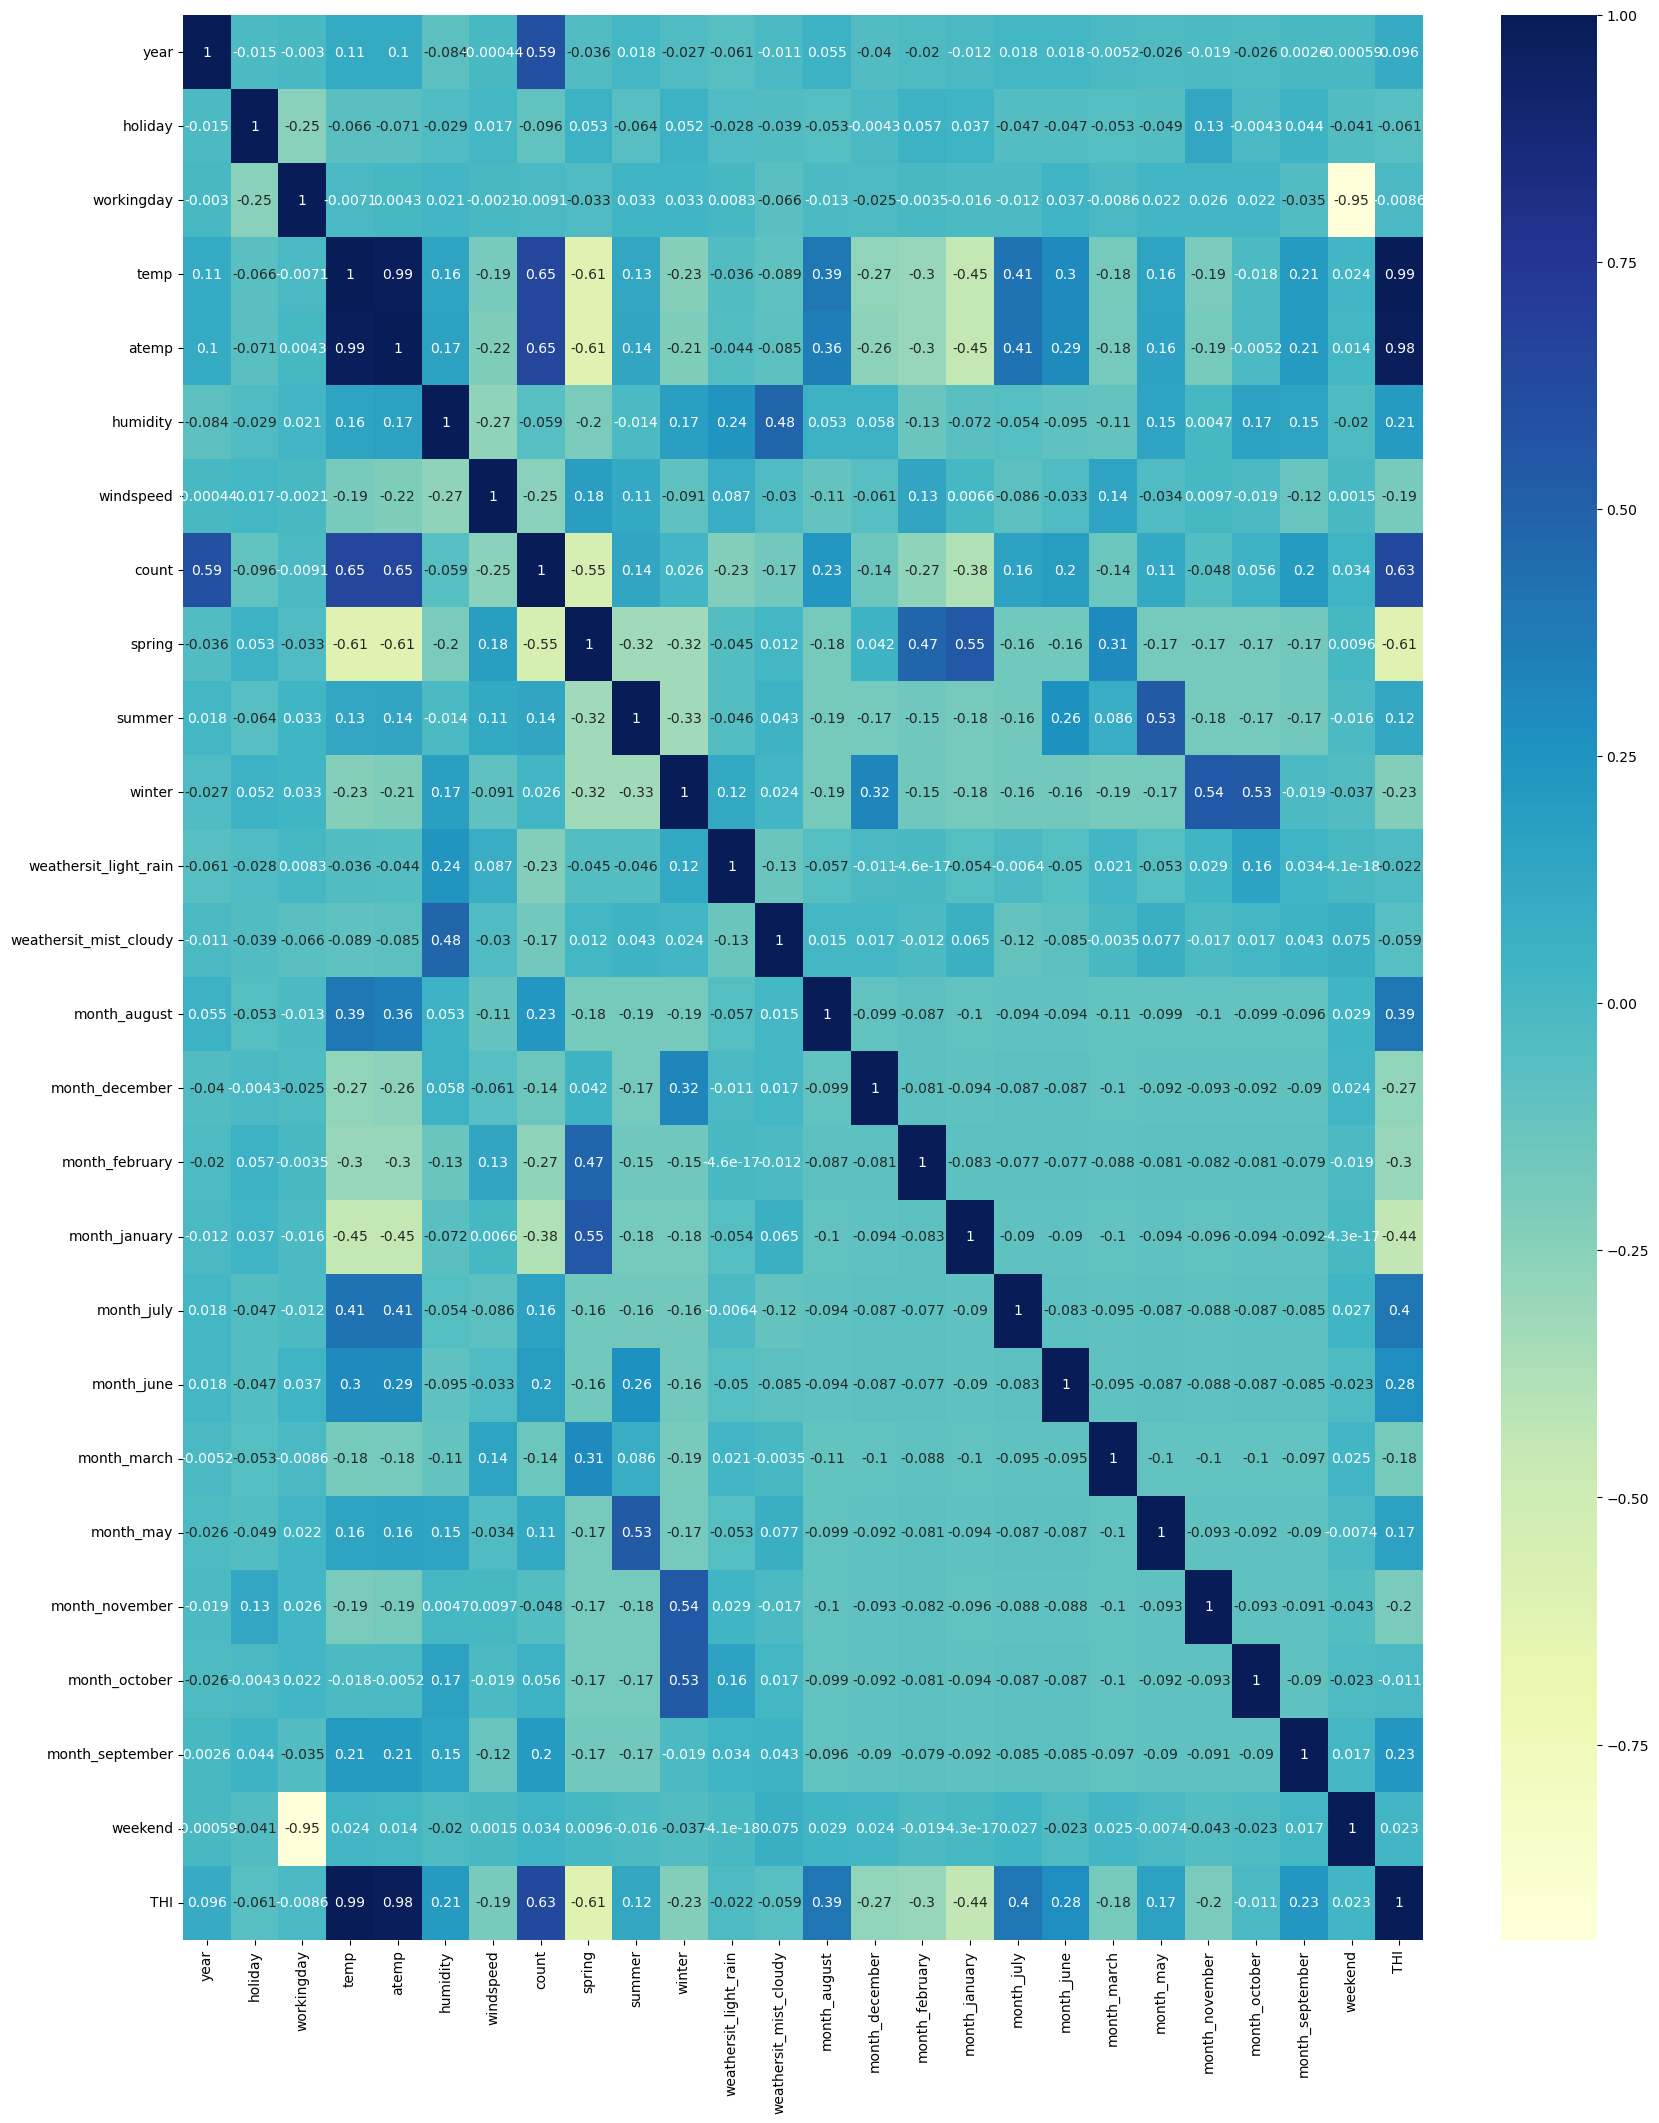

In [638]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(20,25))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

`temp` has the highest correlation to `count`.

#### 6.1: Model Building

In [639]:
# Divding into X and y for model building

y_train = df_train.pop('count')
X_train = df_train

<h5 style="color:green">1st Model</h5>

Let's fit a line and check the parameteres pf the highest correlated predictors - `temp`

In [640]:
# Add a constant
X_train_trial = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_trial).fit()

# Summary of the first model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           2.46e-61
Time:                        09:13:31   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.0

`R-squared: 0.416` is not a good score with `P(F-statistics)` almost `0`. `temp` variable is significant with `0` `p-value`. Lets add another predictor variable.

<h5 style="color:green">2nd Model</h5>

In [641]:
X_train_trial = sm.add_constant(X_train[['temp','THI']])
lr_2 = sm.OLS(y_train, X_train_trial).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     195.4
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           1.21e-63
Time:                        09:13:31   Log-Likelihood:                 184.63
No. Observations:                 510   AIC:                            -363.3
Df Residuals:                     507   BIC:                            -350.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4328      0.066      6.522      0.000       0.302       0.563
temp           1.9844      0.325      6.106      0.000       1.346       2.623
THI           -0.0517      0.012     -4.155      0.000      -0.076      -0.027
==============================================================================
Omnibus:                        6.703   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                4.445
Skew:                           0.045   Prob(JB):                        0.108
Kurtosis:                       2.552   Cond. No.                         884.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Improved** `R-squared: 0.435`, indicating that the model explains 43.5% of the variability in the dependent variable `count`. But `THI` is negatively corelated. Both the variables are significant as p-value is 0.

<h5 style="color:green">3rd Model</h5>

In [642]:
# Taking all the variables for reference
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     108.6
Date:                Fri, 19 Sep 2025   Prob (F-statistic):          1.22e-180
Time:                        09:13:31   Log-Likelihood:                 520.53
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     484   BIC:                            -879.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

**💡 Initial Observations**

`R-squared: 0.849`, indicating that the model explains ~85% of the variability in the dependent variable count  
`Adjusted R-squared: 0.841`, which is also extremely high and confirms the model's fit but not perfect.  
`F-statistic: Very high (108.6)` with a p-value of nearly zero, indicating that the model is statistically significant.  
There are many features, whose p-value is more than 0.05, so futher I will deploy automatic feature selection technique, called **Recursive Feature Elimination (RFE)** and then do fine tuning of the model by manupulating features manually.

<h5 style="color:green">4th Model</h5>

In [643]:
# Running RFE with the output number of the variable equal to 12
lm=LinearRegression()
lm.fit(X_train, y_train)

rfe=RFE(estimator=lm, n_features_to_select=12)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=12)

In [644]:
# Features distribution by RFE
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('year', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.False_, np.int64(7)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.False_, np.int64(6)),
 ('humidity', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('spring', np.True_, np.int64(1)),
 ('summer', np.True_, np.int64(1)),
 ('winter', np.True_, np.int64(1)),
 ('weathersit_light_rain', np.True_, np.int64(1)),
 ('weathersit_mist_cloudy', np.True_, np.int64(1)),
 ('month_august', np.False_, np.int64(10)),
 ('month_december', np.False_, np.int64(4)),
 ('month_february', np.False_, np.int64(5)),
 ('month_january', np.False_, np.int64(2)),
 ('month_july', np.True_, np.int64(1)),
 ('month_june', np.False_, np.int64(14)),
 ('month_march', np.False_, np.int64(13)),
 ('month_may', np.False_, np.int64(9)),
 ('month_november', np.False_, np.int64(3)),
 ('month_october', np.False_, np.int64(12)),
 ('month_september', np.True_, np.int64(1)),
 ('weekend', np.False_, np.int64(8)),
 ('THI', np.Fa

In [645]:
# Features which support the target
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'weathersit_light_rain', 'weathersit_mist_cloudy',
       'month_july', 'month_september'],
      dtype='object')

In [646]:
# Rejected columns
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'month_august', 'month_december',
       'month_february', 'month_january', 'month_june', 'month_march',
       'month_may', 'month_november', 'month_october', 'weekend', 'THI'],
      dtype='object')

In [647]:
# Creating X_train dataframe with RFE selected columns
X_train_rfe = X_train[col]

# Adding constant to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a fourth fitted model
lr_4 = sm.OLS(y_train, X_train_rfe).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Fri, 19 Sep 2025   Prob (F-statistic):          2.95e-190
Time:                        09:13:31   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2848      0.034      8.258      0.000       0.217       0.353
year                       0.2294      0.008     28.208      0.000       0.213       0.245
holiday                   -0.0969      0.026     -3.787      0.000      -0.147      -0.047
temp                       0.5299      0.034     15.728      0.000       0.464       0.596
humidity                  -0.1726      0.038     -4.569      0.000      -0.247      -0.098
windspeed                 -0.1822      0.026     -7.074      0.000      -0.233      -0.132
spring                    -0.0564      0.021     -2.700      0.007      -0.097      -0.015
summer                     0.0531      0.015      3.536      0.000       0.024       0.083
winter                     0.0976      0.017      5.643      0.000       0.064       0.132
weathersit_light_rain     -0.2369      0.026     -8.983      0.000      -0.289      -0.185
weathersit_mist_cloudy    -0.0527      0.010     -5.017      0.000      -0.073      -0.032
month_july                -0.0572      0.018     -3.123      0.002      -0.093      -0.021
month_september            0.0833      0.017      4.973      0.000       0.050       0.116
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.221
Skew:                          -0.612   Prob(JB):                     5.28e-29
Kurtosis:                       5.151   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Now, let's check how much each of the feature variables are correlated with each other

In [648]:
# Dropping the constant variable
X_train_rfe = X_train_rfe.drop('const',axis=1)

In [649]:
# Function to calculate Variance Inflation Factor or VIF
def VIF(X_train_rfe):
    vif = pd.DataFrame()
    vif['Features']=X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

In [650]:
VIF(X_train_rfe)

,Features,VIF
3,humidity,28.03
2,temp,16.03
4,windspeed,4.65
5,spring,4.01
7,winter,3.33
6,summer,2.79
9,weathersit_mist_cloudy,2.28
0,year,2.08
10,month_july,1.58
11,month_september,1.38


All the 12 varaibles selected through post deploying Recursive Feature Elimination method, has significance value less `0.05`, however **Varience Inflation factor** of **humidity** is `very high`. So, dropping **humidity** variable and rebuilding the model.

<h5 style="color:green">5th Model</h5>

In [651]:
# Dropping humidity variable due to high VIF
X_train_rfe = X_train_rfe.drop('humidity',axis=1)

# Adding a constant variable
X_train_lm = sm.add_constant(X_train_rfe)

# Create a fifth fitted model
lr_5 = sm.OLS(y_train, X_train_lm).fit()

# Summary of 5th model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Fri, 19 Sep 2025   Prob (F-statistic):          5.06e-187
Time:                        09:13:31   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [652]:
# Checking Variance Inflation Factor or VIF
vif = pd.DataFrame()
X=X_train_rfe
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,year,2.07
6,winter,1.78
9,month_july,1.58
8,weathersit_mist_cloudy,1.55
10,month_september,1.34
7,weathersit_light_rain,1.08


Variable **temp** has `VIF = 5.09`.This is fine, but dropping it to get more finner model.

- The values of R-squared and Adjusted R-squared are almost similar, which indicates that none of the selected features are redundant.  
- `Variance Inflation Factor` for the remianing features are now within the acceptable range and `p-value` of all the trained variables are within `0.05`.

#### 6.2: Model Evaluation

#### Residual Analysis of the train data

In [655]:
# Making predictions of the trained dataset
y_train_pred = lr_5.predict(X_train_lm)

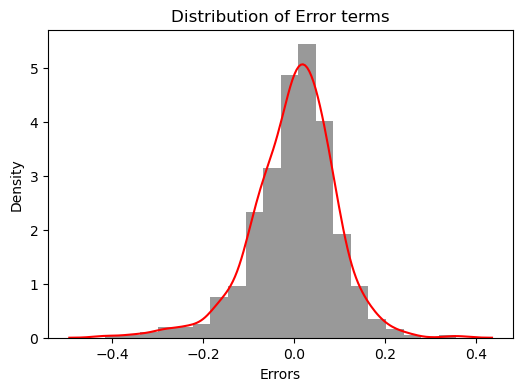

In [656]:
# Plotting Histogram of the error terms
plt.figure(figsize=(6,4))
sns.distplot(y_train - y_train_pred, color='black', bins = 20, kde_kws={'color':'red'})
plt.title('Distribution of Error terms', fontsize = 12)                   
plt.xlabel('Errors', fontsize = 10)
plt.show()

Error terms are `ditributed normally` around `0`

Let's see if the error terms demonstatre **Homoscedasticity** or **Heteroscedasticity**

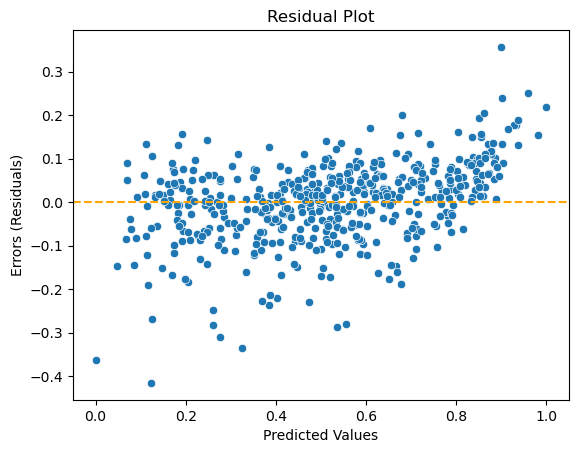

In [657]:
# Let's find the difference between actual target value and predicted target value
res = y_train - y_train_pred

# Let's see the distrubution of the error terms
sns.scatterplot(x=y_train, y=res)
plt.axhline(0,color='orange', linestyle ='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Errors (Residuals)")
plt.show()

**Observations: Model evaluation**

- As the error terms are randomly distributed around the horizontal line (zero) with no clear pattern (widening or narrowing), it has white noise or `homoscedasticity`. Or in other words, the varience of the residuals are constant across all the independent variables (Xi).  
- Moreover, there is no cyclic pattern observed. So, the error terms are independent and doesn't have any correlation.

**R-Squared** values for train prediction

In [681]:
r2_train = r2_score(y_train, y_train_pred)
r2_train

0.835281973840364

In [694]:
# Adjusted R-Squared value

A = X_test.shape[0]
B = X_test.shape[1]
adjusted_r2 = 1-(1-r2_train)*(A-1)/(A-B-1)
adjusted_r2

0.8140554240775242

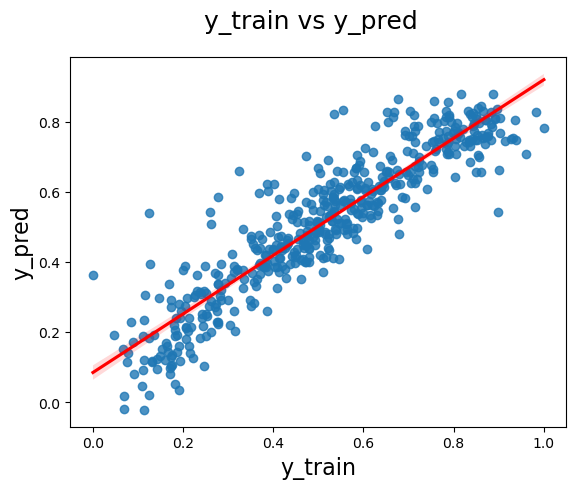

In [695]:
# Plottoing y_train and y_train_pred to find linearity.
sns.regplot(x=y_train, y=y_train_pred, line_kws={"color":'red'})
plt.suptitle('y_train vs y_pred', fontsize=18)               
plt.xlabel('y_train', fontsize=16)                         
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Making Prediction on Test data

In [660]:
# Normalizing the data of the test sets
num_vars = ["temp","atemp","humidity","windspeed","count"]

# Again applying MinMax scaler method to normalise the test data 
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [661]:
df_test.describe()

,temp,atemp,humidity,windspeed,count,spring,summer,winter,weathersit_light_rain,weathersit_mist_cloudy,...,month_january,month_july,month_june,month_march,month_may,month_november,month_october,month_september,weekend,THI
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.027273,0.318182,...,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.327273,19.533487
std,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.163248,0.466833,...,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.470288,6.006092
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.224681
25%,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.196700
50%,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.571954
75%,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.083064
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.202997


In [662]:
# Dividing into x_test and y_test

y_test = df_test.pop('count')
X_test = df_test

In [664]:
# Now let's use our model to make predictions

# Creating X_test_new by keeping only the columns that were used for model building
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [665]:
# Making prediction on test dataset
y_test_pred = lr_5.predict(X_test_new)

In [671]:
# Calculating Mean Squared Error and R Squared value on test dataset
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"MSE value =",mse_test, "and R-Squared value =",round(r2_test * 100,2))

MSE value = 0.009310968608097098 and R-Squared value = 80.53


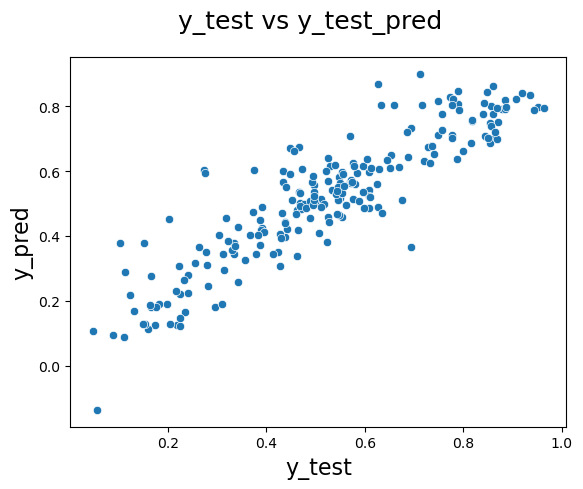

In [680]:
# Plotting y_test and y_test_pred to understand the spread
fig = plt.figure()
sns.scatterplot(x=y_test, y=y_test_pred)
fig.suptitle("y_test vs y_test_pred", fontsize=18)
plt.xlabel('y_test', fontsize=16)                         
plt.ylabel('y_pred', fontsize=16)  
plt.show()

**💡 Observations: On Test Data**

- MSE value of 0.00931 suggests that the model's predictions are very close to the actual values  
- 𝑅-squared value of 80.53% indicates that a significant portion of the variability in the data is explained by the model

#### Model Evaluation

In [683]:
r2_diff = r2_train - r2_test
print(f"The Difference between R Squared values of Train and Test data is",round(r2_diff * 100,2),"%")

The Difference between R Squared values of Train and Test data is 3.0 %


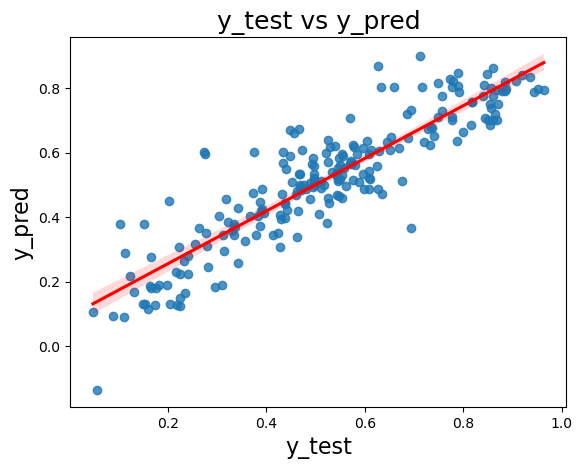

In [689]:
# Plotting a regression plot between y_test and y_test_pred
sns.regplot(x=y_test, y=y_test_pred, line_kws={'color':'red'})
plt.title('y_test vs y_pred', fontsize=18)               
plt.xlabel('y_test', fontsize=16)                         
plt.ylabel('y_pred', fontsize=16) 
plt.show()

**💡 Observations: Model Evaluation**

- The points lie close to the regression line, indicating that the predicted values are close to the actual values. Linearity established.  
- The points are tightly clustered around the regression line, it indicates a good fit, meaning the model predictions are accurate.  
- The regression line is almost 45 degree line, indicating that the model is unbiaded.  
- Points that are far from the regression line indicate outliers, which may suggest areas where the model will not perform well.

#### Final Model Information

In [690]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Fri, 19 Sep 2025   Prob (F-statistic):          5.06e-187
Time:                        09:46:41   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [692]:
round(lr_5.params,4)

const                     0.1994
year                      0.2336
holiday                  -0.0975
temp                      0.4910
windspeed                -0.1479
spring                   -0.0672
summer                    0.0465
winter                    0.0817
weathersit_light_rain    -0.2842
weathersit_mist_cloudy   -0.0802
month_july               -0.0521
month_september           0.0768
dtype: float64

**Answer to the Business question**  
    
##### Which variables are significant in predicting the demand for shared bike:  
- Data reflects that as temperature increases demand increases  .
- EDA suggesed rise in demandduring fall, but fall failed be qulify as the significant feature for model building. So, as per model, summer and winter has seen rising demands.
- Resonating with the EDA analysis, the model also consider september as the month when the demand was high. So it is a good predictor.  
- Year treand is showing rise in demand  
When weather condition is Light_Rain or Mist_Cloudy, people were reluctunt to hike bikes.
- Spring season and july month shows decline in demand.  
- As windspeed increased people find it difficult to handle bikes, so the demand fell.  
- During holidays also people prefer staying at home, so demand decreased.